In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# set figure size and figure format 

plt.rcParams['figure.figsize'] = [8, 6]
%config InlineBackend.figure_format = 'svg'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv('data/prosperLoanData.csv')

In [5]:
df.head(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.shape

(113937, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

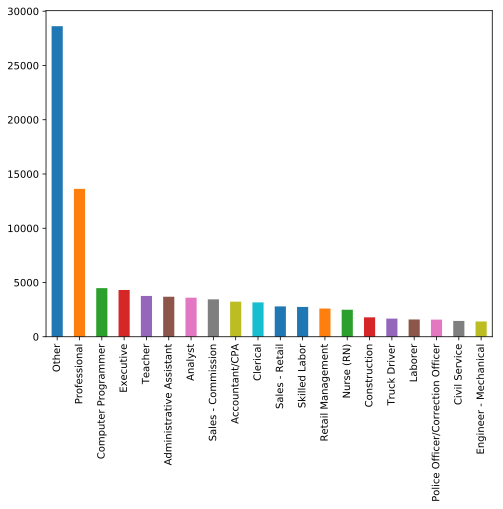

In [9]:
df.Occupation.value_counts().head(20).plot(kind = 'bar');

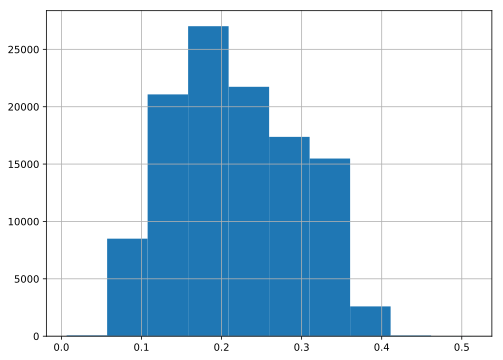

In [10]:
df.BorrowerAPR.hist();

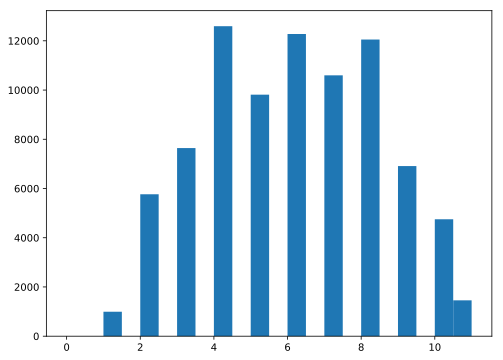

In [11]:
bins = np.arange(0, df['ProsperScore'].max()+.5, .5)
plt.hist(data = df, x = 'ProsperScore', bins = bins);

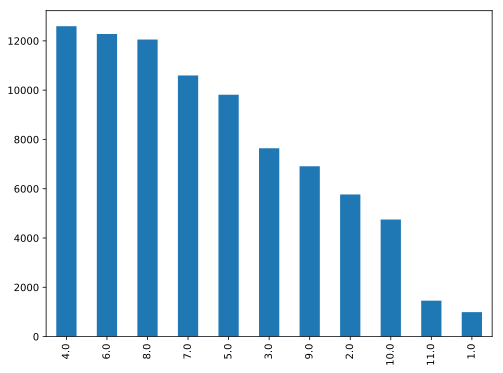

In [12]:
base_color = sns.color_palette()[0]
df['ProsperScore'].value_counts().plot(kind = 'bar', color = base_color)

In [13]:
prosperscore = df['ProsperScore'].dropna()

In [14]:
level_order = ['1.0','2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0']
order_cat = pd.api.types.CategoricalDtype(ordered = True, categories=level_order)
prosperscore = prosperscore.astype(order_cat)

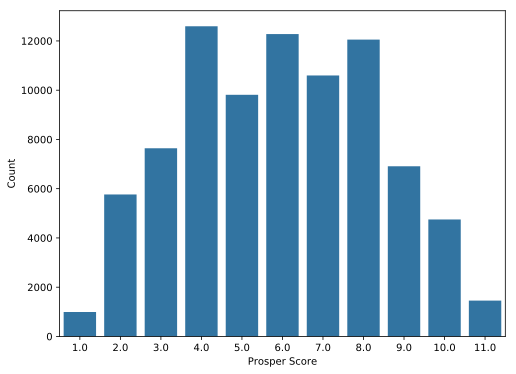

In [15]:
# prosper score count plot
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'ProsperScore', color = base_color);
plt.xticks(rotation = 0);
plt.xlabel('Prosper Score')
plt.ylabel('Count');

In [16]:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [17]:

df['BorrowerRate'] =df['BorrowerRate'].apply(lambda x: x *100)

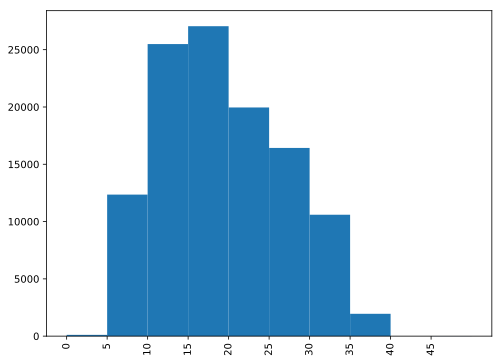

In [18]:
# Borrower Rate

ticks =np.arange(0, 50 ,5)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerRate'].max()+5, 5)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);


In [19]:
df['BorrowerRate'].describe()

count    113937.000000
mean         19.276406
std           7.481843
min           0.000000
25%          13.400000
50%          18.400000
75%          25.000000
max          49.750000
Name: BorrowerRate, dtype: float64

In [20]:
df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

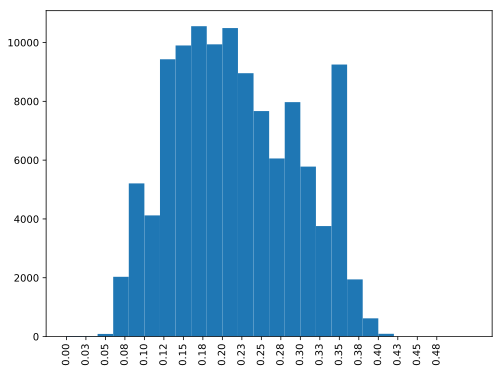

In [21]:
# Borrower Rate
ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerAPR'].max()+.02, .02)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90); 

In [22]:
occ = df['Occupation'].value_counts().head(10)

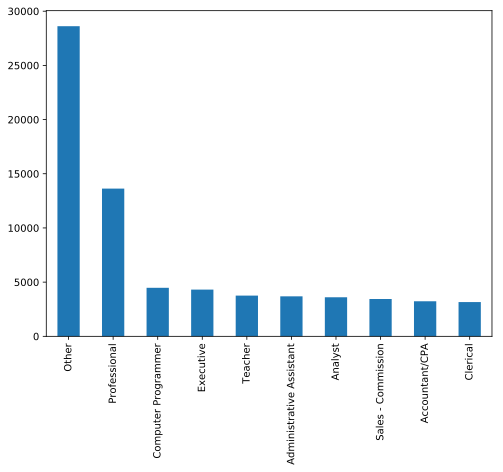

In [23]:
occ.plot(kind = 'bar', color = base_color);

In [24]:
type_order = df['EmploymentStatus'].value_counts().index

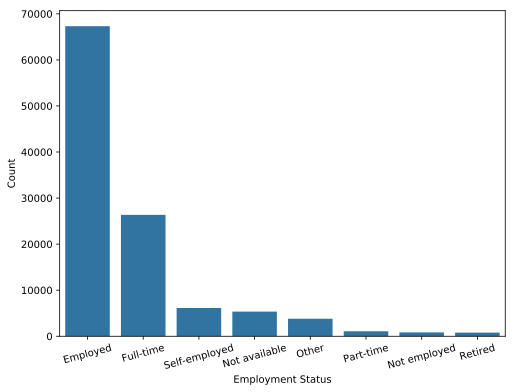

In [25]:
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color, order=type_order);
plt.xticks(rotation = 15);
plt.xlabel('Employment Status')
plt.ylabel('Count');

In [26]:
df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

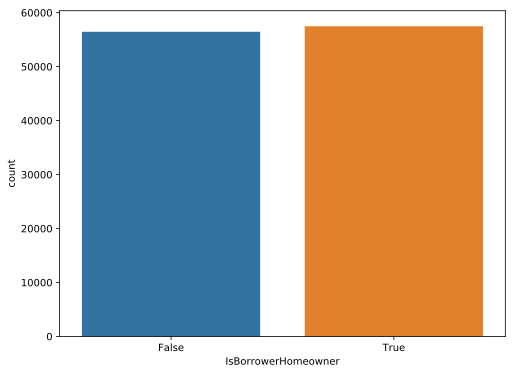

In [27]:
# is borrower home owner
sns.countplot( data = df, x = 'IsBorrowerHomeowner');

In [28]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [29]:
type_order_income = df['IncomeRange'].value_counts().index

Text(0, 0.5, 'Income Range')

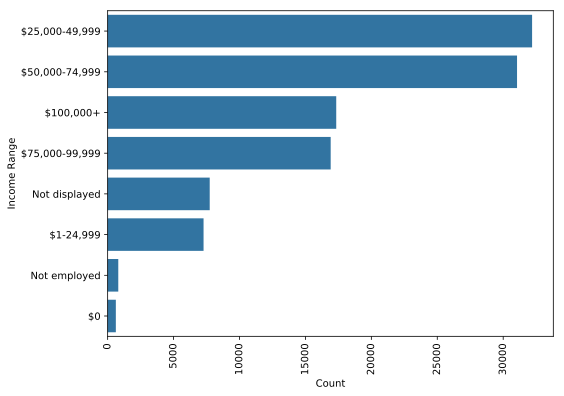

In [30]:
sns.countplot(data = df, y = 'IncomeRange', color = base_color, order  = type_order_income)
plt.xticks(rotation = 90);
plt.xlabel('Count')
plt.ylabel('Income Range')

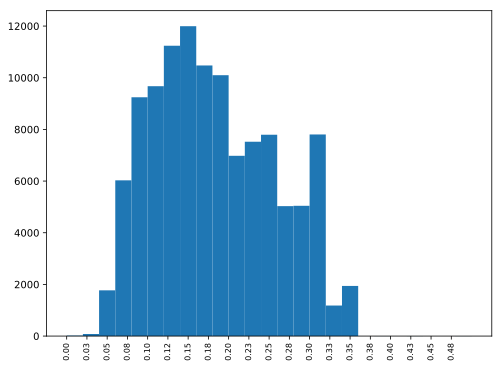

In [157]:
# lender yield

ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
bins = np.arange(0, df['LenderYield'].max()+.02, .02)
plt.hist(data = df, x = 'LenderYield', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90); 

In [38]:
# total inquery
order_type_inq = df['TotalInquiries'].value_counts().head(20).index

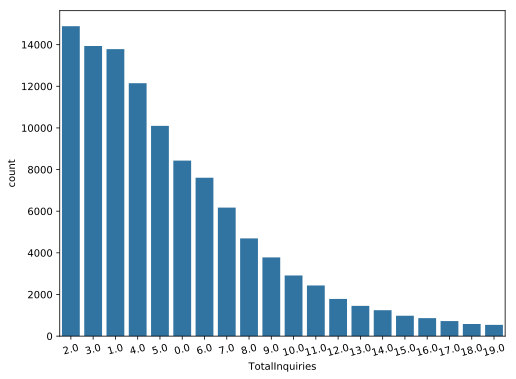

In [41]:
# use order type for highest to lowest
plt.figure(figsize=(8,6))
sns.countplot(data =df, x = 'TotalInquiries', order = order_type_inq, color=base_color);
plt.xticks(rotation = 15);

(-1, 20.5)

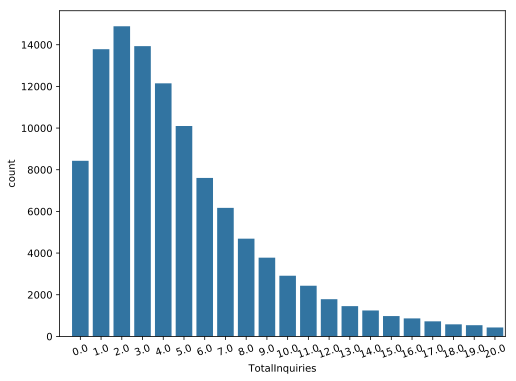

In [57]:
# no order type, use x limit to take only first 20 value, 

plt.figure(figsize=(8,6))
sns.countplot(data =df, x = 'TotalInquiries', color=base_color);
plt.xticks(rotation = 20);
plt.xlim((-1,20.5))